# **The Cities of Tomorrow – Urban Growth & Sustainability**

This Notebook was created to explore how modern data science techniques can help us understand, evaluate, and predict the sustainability of future cities. Using a real-world–inspired dataset, we walk through a full end-to-end analysis: from data cleaning to predictive modeling.

# Objectives

By combining EDA, machine learning, and narrative-driven explanation, this Notebook demonstrates how data science can:

* Diagnose environmental challenges;
* Support sustainable development goals;
* Guide infrastructure investment;
* Anticipate risks and opportunities;
* Inspire smarter and more equitable urban growth.


# Setup Environment


In this Notebook, we will be using the following libraries:

*   [`kagglehub`](https://github.com/Kaggle/kagglehub) for interacting with Kaggle resources.
*   [`pandas`](https://pandas.pydata.org/) for managing the data.
*   [`numpy`](https://numpy.org/) for mathematical operations.
*   [`matplotlib`](https://matplotlib.org/) for data visualization.
*   [`seaborn`](https://seaborn.pydata.org/) for statistical data visualization.
*   [`scipy`](https://scipy.org/) for statistical operations.
*   [`sklearn`](https://scikit-learn.org/stable/) for predictive data analysis.


# Install Required Libraries

For this environment, `kagglehub` library requires installation.


In [2]:
pip install kagglehub

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [kagglehub]
Note: you may need to restart the kernel to use updated packages.


### Importing Required Libraries

In [ ]:
import kagglehub
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Data Loading, Cleaning & Preparation

The analysis begins by importing the dataset `urban_planning_dataset.csv`, followed by:

* Inspecting its structure, dimensions, and data types;
* Checking for missing values, duplicates, and anomalies;
* Identifying variable categories (numerical vs. categorical);
* Preparing the target variable: Urban Sustainability Score (0–1);
* Applying standard feature scaling for machine learning models;
* Ensuring reproducibility with consistent train/test splits.

This establishes a clean and reliable foundation for further analysis.

## Load Dataset

The following code is used to download the most recent CSV file to this environment, and import the file to a pandas dataframe.

In [14]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
#import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "urban_planning_dataset.csv"

# Load the latest version
df = kagglehub.dataset_load(
  KaggleDatasetAdapter.PANDAS,
  "programmer3/sustainable-urban-planning-and-landscape-dataset",
  file_path,
  # Provide any additional arguments like 
  # sql_query or pandas_kwargs. See the 
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

Print the first 5 entries of the dataset to confirm loading.


In [15]:
df.head(5)

,building_density,road_connectivity,public_transport_access,air_quality_index,green_cover_percentage,carbon_footprint,population_density,crime_rate,avg_income,renewable_energy_usage,disaster_risk_index,land_use_type_Commercial,land_use_type_Green Space,land_use_type_Industrial,land_use_type_Residential,urban_sustainability_score
0,0.367915,0.393821,0.428129,0.414830,0.238555,0.921950,0.126449,0.547160,0.932412,0.382358,0.446242,0.0,0.0,1.0,0.0,0.259239
1,0.414306,0.608445,0.658481,0.490982,0.917681,0.178213,0.325124,0.764042,0.903241,0.377167,0.936824,0.0,1.0,0.0,0.0,0.576923
2,0.827902,0.444679,0.263853,0.264529,0.077883,0.295159,0.042150,0.575736,0.208098,0.237949,0.463054,0.0,0.0,0.0,1.0,0.252844
3,0.733936,0.742708,0.012022,0.486974,0.427303,0.975900,0.663838,0.826727,0.258951,0.876539,0.204293,0.0,0.0,1.0,0.0,0.409002
4,0.769643,0.228268,0.519082,0.945892,0.532321,0.370856,0.429912,0.127542,0.180394,0.679006,0.151421,0.0,0.0,1.0,0.0,0.686376


## Data Cleaning and Preparation

Inspect basic structure.

In [43]:
df.shape

(3476, 16)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476 entries, 0 to 3475
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   building_density            3476 non-null   float64
 1   road_connectivity           3476 non-null   float64
 2   public_transport_access     3476 non-null   float64
 3   air_quality_index           3476 non-null   float64
 4   green_cover_percentage      3476 non-null   float64
 5   carbon_footprint            3476 non-null   float64
 6   population_density          3476 non-null   float64
 7   crime_rate                  3476 non-null   float64
 8   avg_income                  3476 non-null   float64
 9   renewable_energy_usage      3476 non-null   float64
 10  disaster_risk_index         3476 non-null   float64
 11  land_use_type_Commercial    3476 non-null   int64  
 12  land_use_type_Green Space   3476 non-null   int64  
 13  land_use_type_Industrial    3476 

In [23]:
duplicates = df.duplicated().sum()
print(f'Total duplicate rows: {duplicates}')

Total duplicate rows: 0


In [45]:
# List of land-use columns to convert
land_use_cols = [
    "land_use_type_Commercial",
    "land_use_type_Green Space",
    "land_use_type_Industrial",
    "land_use_type_Residential"
]

# Convert float to int
df[land_use_cols] = df[land_use_cols].astype(int)
df.dtypes

building_density              float64
road_connectivity             float64
public_transport_access       float64
air_quality_index             float64
green_cover_percentage        float64
carbon_footprint              float64
population_density            float64
crime_rate                    float64
avg_income                    float64
renewable_energy_usage        float64
disaster_risk_index           float64
land_use_type_Commercial        int64
land_use_type_Green Space       int64
land_use_type_Industrial        int64
land_use_type_Residential       int64
urban_sustainability_score    float64
dtype: object

In [49]:
# Compute correlation matrix
corr_matrix = df.corr()

corr_matrix

,building_density,road_connectivity,public_transport_access,air_quality_index,green_cover_percentage,carbon_footprint,population_density,crime_rate,avg_income,renewable_energy_usage,disaster_risk_index,land_use_type_Commercial,land_use_type_Green Space,land_use_type_Industrial,land_use_type_Residential,urban_sustainability_score
building_density,1.000000,-0.014771,0.017453,0.027841,-0.010515,-0.010294,-0.003227,0.003622,-0.006850,0.016142,0.002344,-0.006753,-0.003466,0.006644,0.003613,0.005958
road_connectivity,-0.014771,1.000000,0.016604,-0.007279,0.001629,-0.028132,-0.001075,-0.022773,-0.008395,-0.012200,-0.007070,0.020361,0.013564,-0.020785,-0.013219,0.016109
public_transport_access,0.017453,0.016604,1.000000,-0.010985,0.002725,0.043503,-0.016242,0.004606,0.005043,-0.008221,0.006086,0.008337,0.004500,0.006471,-0.019022,0.203036
air_quality_index,0.027841,-0.007279,-0.010985,1.000000,-0.010567,-0.014434,0.009704,-0.007388,-0.014050,0.017241,-0.041887,-0.024913,0.013642,0.003553,0.007801,0.018695
green_cover_percentage,-0.010515,0.001629,0.002725,-0.010567,1.000000,0.010713,-0.012843,0.012227,0.035667,0.040345,-0.021283,-0.028734,-0.003497,0.001798,0.030174,0.690025
carbon_footprint,-0.010294,-0.028132,0.043503,-0.014434,0.010713,1.000000,0.003770,0.020640,0.001274,-0.027000,0.008813,-0.013187,-0.006897,0.011767,0.008360,-0.337701
population_density,-0.003227,-0.001075,-0.016242,0.009704,-0.012843,0.003770,1.000000,0.010296,-0.004221,-0.008774,-0.006974,-0.025382,0.024575,-0.016651,0.017257,-0.017371
crime_rate,0.003622,-0.022773,0.004606,-0.007388,0.012227,0.020640,0.010296,1.000000,-0.001010,0.017237,-0.009200,0.004706,-0.015004,-0.000423,0.010517,-0.207367
avg_income,-0.006850,-0.008395,0.005043,-0.014050,0.035667,0.001274,-0.004221,-0.001010,1.000000,-0.020225,-0.006769,-0.014758,0.013694,-0.010038,0.010968,0.018001
renewable_energy_usage,0.016142,-0.012200,-0.008221,0.017241,0.040345,-0.027000,-0.008774,0.017237,-0.020225,1.000000,-0.003273,-0.014184,0.015591,-0.001499,0.000183,0.481232


### Conclusions

#### Dataset Overview:

* Dataset shape: 3476 rows, 16 columns;
* The columns are numeric; 
* No string columns were detected;
* No missing values;
* No duplicate rows were found;
* Categorical columns were found, updated data types.

#### Target detection:
The numeric column `urban_sustainability_score` is selected as the target.

## 2. Exploratory Data Analysis (EDA)

A combination of statistical summaries and visualizations is used to understand:

* Distribution shapes of key indicators;
* Correlations between urban features and sustainability outcomes;
* Relationships among environmental, socio-economic, and spatial attributes;
* Potential multicollinearity and feature clustering.

The EDA helps uncover meaningful patterns, such as which urban conditions contribute positively or negatively to sustainability.


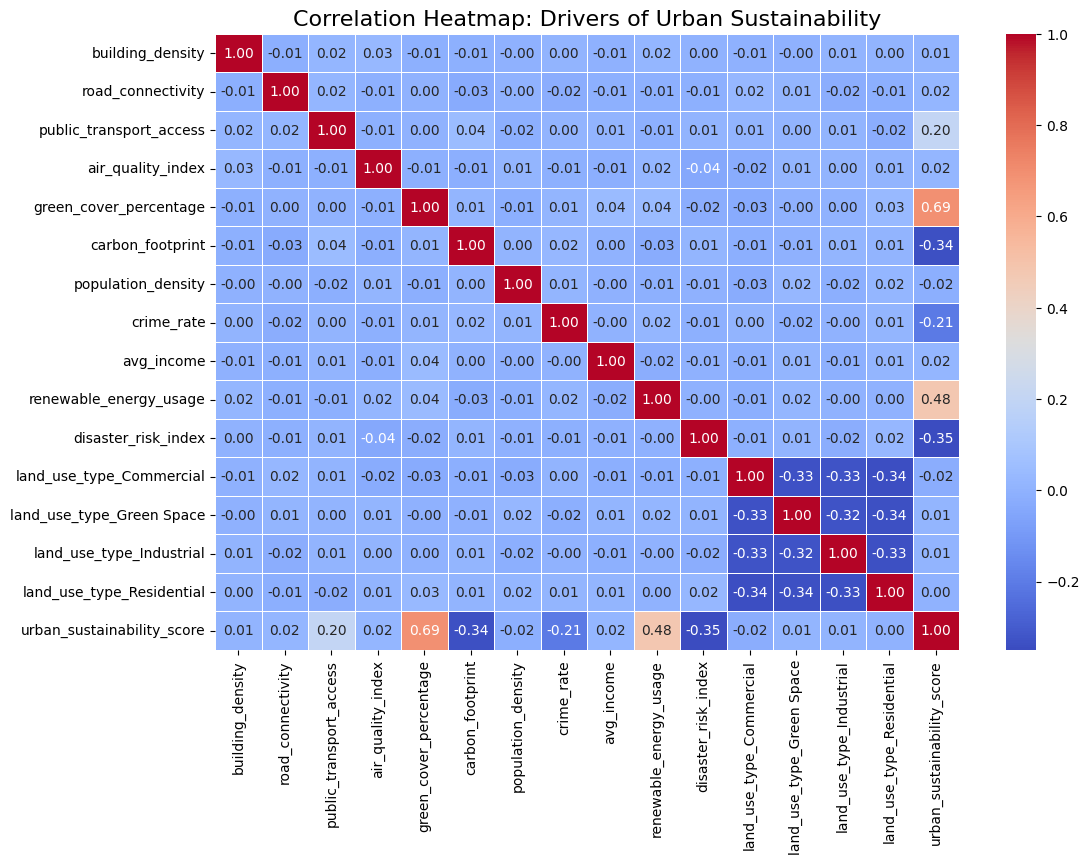

In [50]:
# Display the matrix as a heatmap
plt.figure(figsize=(12, 8))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths='0.5')
plt.title('Correlation Heatmap: Drivers of Urban Sustainability', fontsize=16)
plt.show()

### Categorical features
Generate Box plots for the different feature that hold categorical values. These features would be "Category", "GPU", "OS", "CPU_core", "RAM_GB", "Storage_GB_SSD"


<AxesSubplot:xlabel='Category', ylabel='Price'>

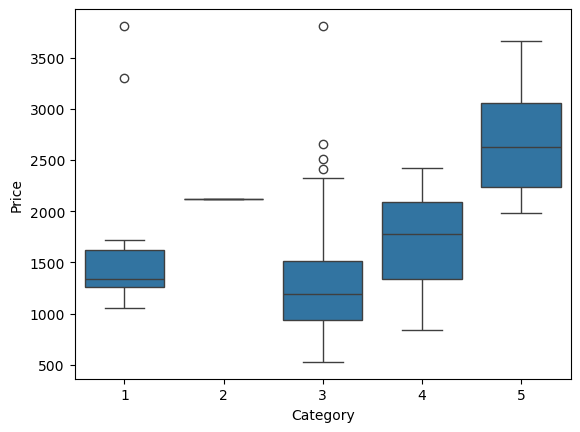

In [19]:
# Write your code below and press Shift+Enter to execute
# Category Box plot
sns.boxplot(x="Category", y="Price", data=df[['Category', 'Price']])

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="Category", y="Price", data=df)
```

</details>


<AxesSubplot:xlabel='GPU', ylabel='Price'>

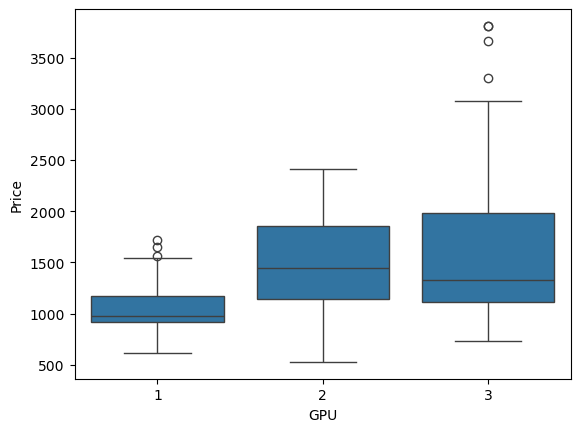

In [20]:
# Write your code below and press Shift+Enter to execute
# GPU Box plot
sns.boxplot(x="GPU", y="Price", data=df[['GPU', 'Price']])

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="GPU", y="Price", data=df)
```

</details>


<AxesSubplot:xlabel='OS', ylabel='Price'>

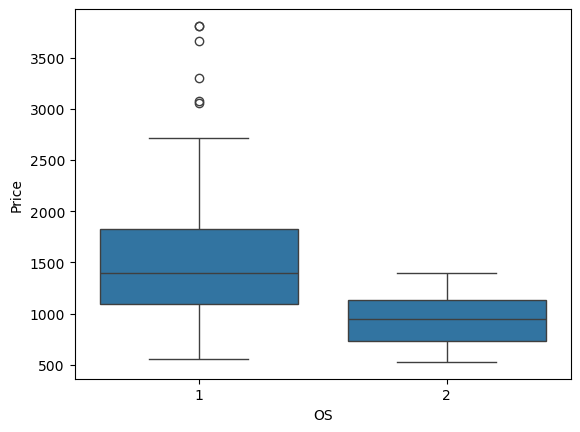

In [21]:
# Write your code below and press Shift+Enter to execute
# OS Box plot
sns.boxplot(x="OS", y="Price", data=df[['OS', 'Price']])

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="OS", y="Price", data=df)
```

</details>


<AxesSubplot:xlabel='CPU_core', ylabel='Price'>

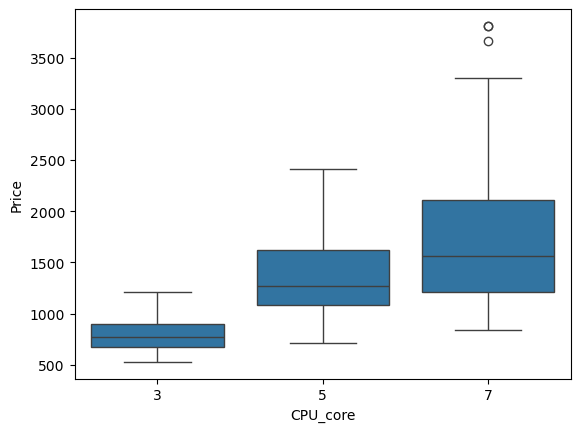

In [22]:
# Write your code below and press Shift+Enter to execute
# CPU_core Box plot
sns.boxplot(x="CPU_core", y="Price", data=df[['CPU_core', 'Price']])

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="CPU_core", y="Price", data=df)
```

</details>


<AxesSubplot:xlabel='RAM_GB', ylabel='Price'>

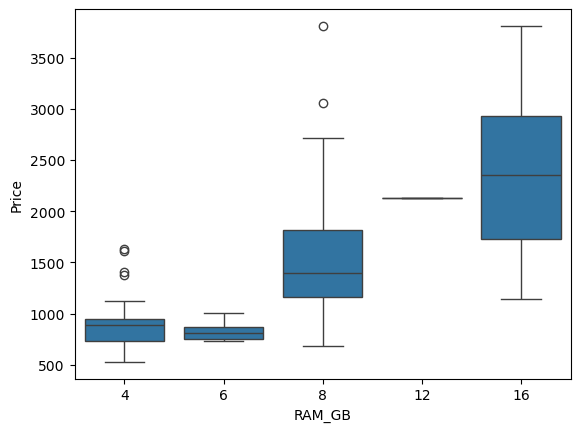

In [23]:
# Write your code below and press Shift+Enter to execute
# RAM_GB Box plot
sns.boxplot(x="RAM_GB", y="Price", data=df[['RAM_GB', 'Price']])

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="RAM_GB", y="Price", data=df)
```

</details>


<AxesSubplot:xlabel='Storage_GB_SSD', ylabel='Price'>

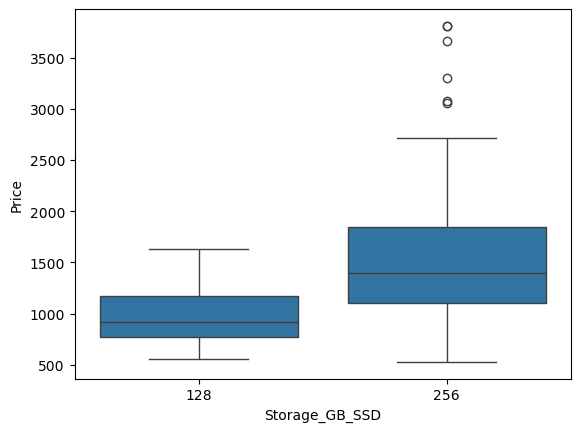

In [24]:
# Write your code below and press Shift+Enter to execute
# Storage_GB_SSD Box plot
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df[['Storage_GB_SSD', 'Price']])

<details>
    <summary>Click here for Solution</summary>
    
```python
sns.boxplot(x="Storage_GB_SSD", y="Price", data=df)
```

</details>


# Task 2 - Descriptive Statistical Analysis


Generate the statistical description of all the features being used in the data set. Include "object" data types as well.


In [27]:
# Write your code below and press Shift+Enter to execute
df.describe()

,Unnamed: 0.1,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,118.500000,118.500000,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,68.848868,68.848868,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,59.250000,59.250000,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,118.500000,118.500000,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,177.750000,177.750000,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,237.000000,237.000000,5.000000,3.000000,2.000000,7.000000,17.300000,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000


In [26]:
# Write your code below and press Shift+Enter to execute
df.describe(include=['object'])

,Manufacturer,Price-binned
count,238,238
unique,11,3
top,Dell,Low
freq,71,160


<details>
<summary>Click here for Solution</summary>

```python
print(df.describe())
print(df.describe(include=['object']))
```

</details>


# Task 3 - GroupBy and Pivot Tables

Group the parameters "GPU", "CPU_core" and "Price" to make a pivot table and visualize this connection using the pcolor plot.


In [28]:
# Write your code below and press Shift+Enter to execute
# Create the group
df_tmp = df[['GPU', 'CPU_core', 'Price']]
df_grouped = df_tmp.groupby(['GPU', 'CPU_core'], as_index=False).mean()
df_grouped

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


In [29]:
# Write your code below and press Shift+Enter to execute
# Create the group
df_grouped = df[['GPU', 'CPU_core', 'Price']].groupby(['GPU', 'CPU_core'], as_index=False).mean()
df_grouped

,GPU,CPU_core,Price
0,1,3,769.250000
1,1,5,998.500000
2,1,7,1167.941176
3,2,3,785.076923
4,2,5,1462.197674
5,2,7,1744.621622
6,3,3,784.000000
7,3,5,1220.680000
8,3,7,1945.097561


<details>
<summary>Click here for Solution</summary>

```python
df_gptest = df[['GPU','CPU_core','Price']]
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
print(grouped_test1)
```

</details>


In [30]:
# Write your code below and press Shift+Enter to execute
# Create the Pivot table
df_grouped_pivot = df_grouped.pivot(index='GPU', columns='CPU_core')
df_grouped_pivot

Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561

<details>
<summary>Click here for Solution</summary>

```python
grouped_pivot = grouped_test1.pivot(index='GPU',columns='CPU_core')
print(grouped_pivot)
```

</details>


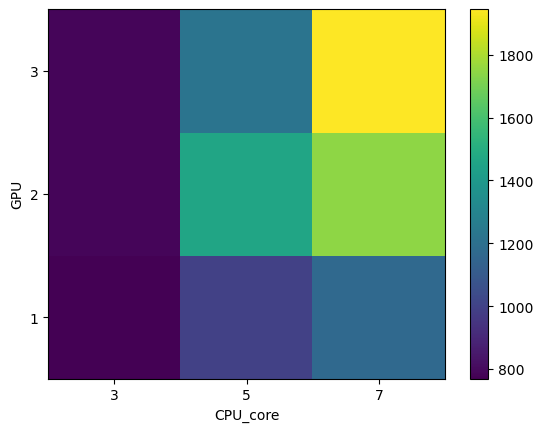

In [90]:
# Write your code below and press Shift+Enter to execute
# Create the Plot
row_labels = df_grouped_pivot.columns.levels[1]
col_labels = df_grouped_pivot.index

plt.pcolor(df_grouped_pivot)
plt.xlabel(row_labels.name)
plt.ylabel(col_labels.name)
plt.xticks(labels=row_labels, ticks=np.arange(df_grouped_pivot.shape[1])+0.5, minor=False)
plt.yticks(labels=col_labels, ticks=np.arange(df_grouped_pivot.shape[0])+0.5, minor=False)
plt.colorbar()
plt.show()

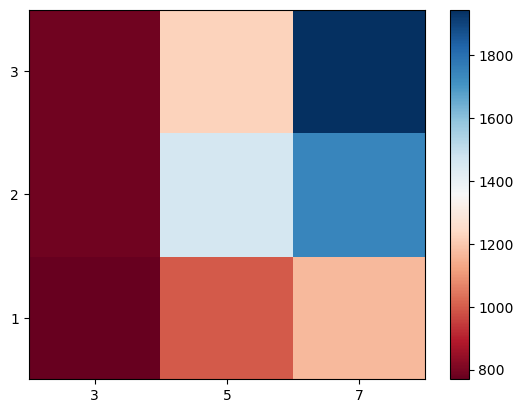

In [33]:
fig, ax = plt.subplots()
im = ax.pcolor(df_grouped_pivot, cmap='RdBu')

#label names
row_labels = df_grouped_pivot.columns.levels[1]
col_labels = df_grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(df_grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(df_grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)

<details>
<summary>Click here for Solution</summary>

```python
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)
```

</details>


# Task 4 - Pearson Correlation and p-values

Use the `scipy.stats.pearsonr()` function to evaluate the Pearson Coefficient and the p-values for each parameter tested above. This will help you determine the parameters most likely to have a strong effect on the price of the laptops.


In [96]:
df.dtypes

Unnamed: 0.1          int64
Unnamed: 0            int64
Manufacturer         object
Category              int64
GPU                   int64
OS                    int64
CPU_core              int64
Screen_Size_inch    float64
CPU_frequency       float64
RAM_GB                int64
Storage_GB_SSD        int64
Weight_pounds       float64
Price                 int64
Price-binned         object
Screen-Full_HD        int64
Screen-IPS_panel      int64
dtype: object

In [99]:
# Write your code below and press Shift+Enter to execute
for col in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[col], df['Price'])
    print(f'{col}: Pearson coefficient = {pearson_coef}, P-value = {p_value}\n')

RAM_GB: Pearson coefficient = 0.5492972971857849, P-value = 3.6815606288424503e-20

CPU_frequency: Pearson coefficient = 0.3666655589258861, P-value = 5.50246335071342e-09

Storage_GB_SSD: Pearson coefficient = 0.24342075521810297, P-value = 0.00014898923191724168

Screen_Size_inch: Pearson coefficient = -0.11064420817118291, P-value = 0.08853397846830661

Weight_pounds: Pearson coefficient = -0.050312258377515455, P-value = 0.4397693853433894

CPU_core: Pearson coefficient = 0.45939777733551174, P-value = 7.912950127008979e-14

OS: Pearson coefficient = -0.22172980114827356, P-value = 0.0005696642559246817

GPU: Pearson coefficient = 0.2882981988881427, P-value = 6.166949698364507e-06

Category: Pearson coefficient = 0.286242755812641, P-value = 7.225696235806858e-06



<details>
<summary>Click here for Solution</summary>

```python
for param in ['RAM_GB','CPU_frequency','Storage_GB_SSD','Screen_Size_inch','Weight_pounds','CPU_core','OS','GPU','Category']:
    pearson_coef, p_value = stats.pearsonr(df[param], df['Price'])
    print(param)
    print("The Pearson Correlation Coefficient for ",param," is", pearson_coef, " with a P-value of P =", p_value)
```

</details>


# Congratulations! You have completed the lab


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


Copyright © 2023 IBM Corporation. All rights reserved.


<!--## Change Log


<!--|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-15|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-18|0.2|Vicky Kuo|Reviewed and Revised|--!>
